In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

Ch09 supplementary examples, P.1

In [ ]:
mydata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/3600/cracker.csv")

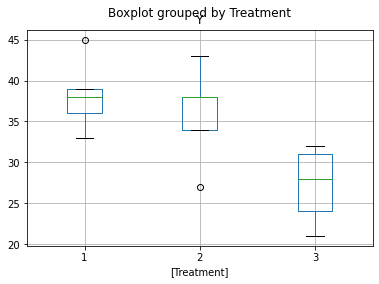

In [ ]:
boxplot = mydata.boxplot(column=["Y"],by=["Treatment"])  

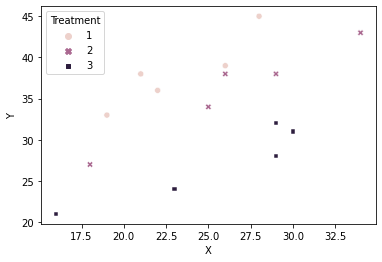

In [ ]:
import seaborn as sns
sns.scatterplot(x='X',y='Y',data=mydata, hue="Treatment",style="Treatment")

In [ ]:
I=mydata.Treatment.nunique()
A=pd.get_dummies(mydata.Treatment).to_numpy()[:,0:2]
n=A.shape[0]
xi=mydata.X
x=np.c_[np.ones(n),xi,A]
y=mydata.Y.to_numpy()

In [ ]:
x

array([[ 1., 21.,  1.,  0.],
       [ 1., 26.,  1.,  0.],
       [ 1., 22.,  1.,  0.],
       [ 1., 28.,  1.,  0.],
       [ 1., 19.,  1.,  0.],
       [ 1., 34.,  0.,  1.],
       [ 1., 26.,  0.,  1.],
       [ 1., 29.,  0.,  1.],
       [ 1., 18.,  0.,  1.],
       [ 1., 25.,  0.,  1.],
       [ 1., 23.,  0.,  0.],
       [ 1., 29.,  0.,  0.],
       [ 1., 30.,  0.,  0.],
       [ 1., 16.,  0.,  0.],
       [ 1., 29.,  0.,  0.]])

In [ ]:
sst=sum((y-y.mean())**2)
dft=n-1

$\hat{y}=\alpha + \gamma x + \tau_1 D_1 + \tau_2 D_2 $

In [ ]:
ixtx=np.linalg.inv(x.T @ x)
beta=ixtx @ x.T @ y
print("beta=", beta)
yhat=x @ beta
res=y-yhat

sse=np.sum(res**2)
dfe=n-I-1
mse=sse/dfe

print(f"sse={sse:5.2f}, mse={mse:5.2f}",)

beta= [ 4.37659064  0.89855942 12.97683073  7.90144058]
sse=38.57, mse= 3.51


In [ ]:
varBeta=mse*ixtx
seBeta=np.sqrt(np.diagonal(varBeta))
tvalue=beta/seBeta
print("se(beta)=",seBeta)
print("tvalue=",tvalue)

se(beta)= [2.73692149 0.10258488 1.2056233  1.18874585]
tvalue= [ 1.5990925   8.7591801  10.76358656  6.64687122]


$\hat{y}=\alpha + \gamma x$

In [ ]:
x1=x[:,[0,1]]
ixtx1=np.linalg.inv(x1.T @ x1)
beta1=ixtx1 @ x1.T @ y
yhat=x1 @ beta1
res=y-yhat
sse1=np.sum(res**2)
print('sse=',sse1)
ssTr=sse1-sse
dfTr=(I-1)
msTr=ssTr/dfTr

ssX=sst-sse-ssTr
dfX=dft-dfe-dfTr
msX=ssX/dfX
fTr=msTr/mse
pTr=1-stats.f(dfTr,dfe).cdf(fTr)

print (f"{'source':<12} {'ss':>12} {'df':>3} {'ms':>12} {'F':>5} {'p-value':>7}")
print (f"{'covariate':<12} {ssX:12.2f} {dfX:>3} {msX:12.2f}")
print (f"{'extra (Tr)':<12} {ssTr:12.2f} {dfTr:>3} {msTr:12.2f} {fTr:5.2f} {pTr:7.4f}")
print (f"{'error':<12} {sse:12.2f} {dfe:>3} {mse:12.2f}")
print (f"{'total':<12} {sst:12.2f} {dft:>3}")

sse= 455.7222222222223
source                 ss  df           ms     F p-value
covariate          190.68   1       190.68
extra (Tr)         417.15   2       208.58 59.48  0.0000
error               38.57  11         3.51
total              646.40  14


In [ ]:
c=np.array([[0,0,1,-1],
            [0,0,1,0],
            [0,0,0,1]])
l=c @ beta
sel=np.sqrt(np.diagonal(c @ varBeta @ c.T))
myt=stats.t(dfe).ppf(1-0.05/2/3)
np.c_[l,sel,l-myt*sel,l+myt*sel]

array([[ 5.07539016,  1.22896513,  1.60966708,  8.54111323],
       [12.97683073,  1.2056233 ,  9.5769324 , 16.37672906],
       [ 7.90144058,  1.18874585,  4.54913722, 11.25374393]])

P.3

In [ ]:
AX=np.array([])
for a,b in zip(xi,A):
  AX=np.r_[AX,np.kron(a,b)]
AX=AX.reshape(n,-1)
x0=np.c_[np.ones(n),xi,A,AX]

In [ ]:
x0

array([[ 1., 21.,  1.,  0., 21.,  0.],
       [ 1., 26.,  1.,  0., 26.,  0.],
       [ 1., 22.,  1.,  0., 22.,  0.],
       [ 1., 28.,  1.,  0., 28.,  0.],
       [ 1., 19.,  1.,  0., 19.,  0.],
       [ 1., 34.,  0.,  1.,  0., 34.],
       [ 1., 26.,  0.,  1.,  0., 26.],
       [ 1., 29.,  0.,  1.,  0., 29.],
       [ 1., 18.,  0.,  1.,  0., 18.],
       [ 1., 25.,  0.,  1.,  0., 25.],
       [ 1., 23.,  0.,  0.,  0.,  0.],
       [ 1., 29.,  0.,  0.,  0.,  0.],
       [ 1., 30.,  0.,  0.,  0.,  0.],
       [ 1., 16.,  0.,  0.,  0.,  0.],
       [ 1., 29.,  0.,  0.,  0.,  0.]])

$\hat{y}=\alpha + \gamma x + \tau_1 D_1 + \tau_2 D_2 + \delta_1 D_1 x + \delta_2 D_2 x$

In [ ]:
ixtx0=np.linalg.inv(x0.T @ x0)
beta0=ixtx0 @ x0.T @ y
yhat=x0 @ beta0
res=y-yhat
sse0=np.sum(res**2)
dfe0=n-(I+1+(I-1))
mse0=sse0/dfe0

print("beta=",beta0)
print(f"sse= {sse0:5.2f}, mse={mse0:5.2f}")

beta= [8.56373938 0.73371105 4.3194723  1.26716441 0.35752983 0.2575426 ]
sse= 31.52, mse= 3.50


In [ ]:
print(f"slope 1 = {beta0[1]+beta0[4]:5.3f}, slope 2= {beta0[1]+beta0[5]:5.3f}, slope 3 = {beta0[1]:5.3f}")

slope 1 = 1.091, slope 2= 0.991, slope 3 = 0.734


In [ ]:
ssPar=sse-sse0
dfPar=dfe-dfe0
msPar=ssPar/dfPar

fPar=msPar/mse0
pPar=1-stats.f(dfPar,dfe0).cdf(fPar)

print (f"{'source':<12} {'ss':>12} {'df':>3} {'ms':>12} {'F':>5} {'p-value':>7}")
print (f"{'extra (Par)':<12} {ssPar:12.2f} {dfPar:>3} {msPar:12.2f} {fPar:5.2f} {pPar:7.4f}")
print (f"{'error':<12} {sse0:12.2f} {dfe0:>3} {mse0:12.2f}")
print (f"{'total':<12} {sst:12.2f} {dft:>3}")

source                 ss  df           ms     F p-value
extra (Par)          7.05   2         3.53  1.01  0.4032
error               31.52   9         3.50
total              646.40  14
